In [1]:
## Importing the required Libraries
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn import datasets
import warnings
warnings.simplefilter('ignore')

In [2]:
## Loading the dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
## Converting features of the data into DataFrame
features = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
## Cecking the target column of the data
target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
## Checking the min and max values of the sepal_length feature
print(f'The min value of sepal_length is: {features.sepal_length.min()}')
print(f'The max value of sepal_length is: {features.sepal_length.max()}')

The min value of sepal_length is: 4.3
The max value of sepal_length is: 7.9


In [6]:
## Creating an array for new variable sepal_lenght
sepal_length = np.arange(4.3, 8.0, 0.1)
sepal_length

array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9])

In [7]:
## Checking the min and max values for the sepal_width feature
print(f'The min value of sepal_width is: {features.sepal_width.min()}')
print(f'The max value of sepal_width is: {features.sepal_width.max()}')

The min value of sepal_width is: 2.0
The max value of sepal_width is: 4.4


In [8]:
## Creating an array for the new variable sepal_width
sepal_width = np.arange(2.0, 4.5, 0.1)
sepal_width

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4])

In [9]:
## Checking the min and max values for the petal_lenght feature
print(f'The min value of petal_length is: {features.petal_length.min()}')
print(f'The max value of petal_length is: {features.petal_length.max()}')

The min value of petal_length is: 1.0
The max value of petal_length is: 6.9


In [10]:
## Creating an array for the new variable petal_length
petal_length = np.arange(1.0, 7.0, 0.1)
petal_length

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9])

In [11]:
## Checking the min and max values for the petal_width feature
print(f'The min value of petal_width is: {features.petal_width.min()}')
print(f'The max value of petal_width is: {features.petal_width.max()}')

The min value of petal_width is: 0.1
The max value of petal_width is: 2.5


In [12]:
## Creating an array for the new variable petal_width
petal_width = np.arange(0.1, 2.6, 0.1)
petal_width

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])

In [13]:
## Cheacking the min and max values for the target
print(f'The min value of target is: {target.min()}')
print(f'The max value of target is: {target.max()}')

The min value of target is: 0
The max value of target is: 2


In [14]:
## Creating an array for the new variale label
label = np.arange(0,3,1)
label

array([0, 1, 2])

In [15]:
## Defining the input and output variables
seplen = ctrl.Antecedent(sepal_length, 'seplen')
sepwid = ctrl.Antecedent(sepal_width, 'sepwid')
petlen = ctrl.Antecedent(petal_length, 'petlen')
petwid = ctrl.Antecedent(petal_width, 'petwid')
lab = ctrl.Consequent(label, 'lab')

In [16]:
## Creation of Fuzzy sets for each variable
seplen.automf(3)
sepwid.automf(3)
petlen.automf(3)
petwid.automf(3)
lab.automf(3)

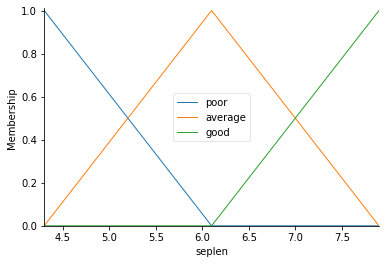

In [25]:
## Membership Function of sepal_length fuzzy sets
seplen.view()

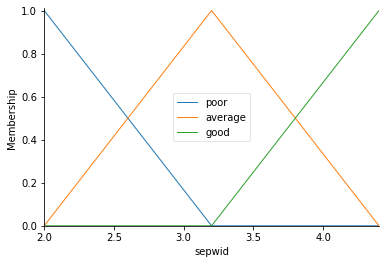

In [18]:
## Membership Function of sepal_width fuzzy sets
sepwid.view()

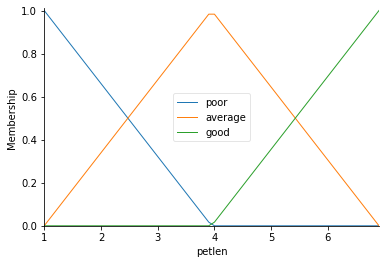

In [19]:
## Membership Function of petal_length fuzzy sets
petlen.view()

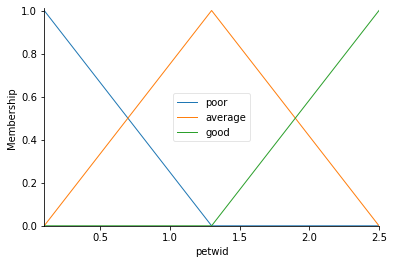

In [20]:
## Membership Function of petal_width fuzzy sets
petwid.view()

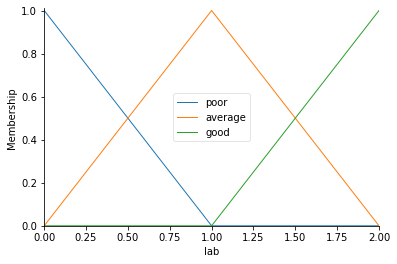

In [21]:
## Membership Function of label fuzzysets
lab.view()

In [27]:
## Rule Base Definition
Rule1 = ctrl.Rule(seplen['poor'] & sepwid['good'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule2 = ctrl.Rule(seplen['poor'] & sepwid['good'] & petlen['average'] & petwid['average'], lab['average'])
Rule3 = ctrl.Rule(seplen['poor'] & sepwid['poor'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule4 = ctrl.Rule(seplen['poor'] & sepwid['poor'] & petlen['average'] & petwid['average'], lab['average'])
Rule5 = ctrl.Rule(seplen['poor'] & sepwid['average'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule6 = ctrl.Rule(seplen['poor'] & sepwid['good'] & petlen['good'] & petwid['good'], lab['average'])
Rule7 = ctrl.Rule(seplen['poor'] & sepwid['average'] & petlen['good'] & petwid['good'], lab['good'])
Rule8 = ctrl.Rule(seplen['poor'] & sepwid['poor'] & petlen['good'] & petwid['good'], lab['good'])
Rule9 = ctrl.Rule(seplen['poor'] & sepwid['average'] & petlen['average'] & petwid['good'], lab['good'])
Rule10 = ctrl.Rule(seplen['poor'] & sepwid['average'] & petlen['good'] & petwid['average'], lab['good'])
Rule11 = ctrl.Rule(seplen['poor'] & sepwid['poor'] & petlen['average'] & petwid['good'], lab['average'])
Rule12 = ctrl.Rule(seplen['poor'] & sepwid['poor'] & petlen['good'] & petwid['average'], lab['average'])
Rule13 = ctrl.Rule(seplen['poor'] & sepwid['average'] & petlen['average'] & petwid['average'], lab['average'])
Rule14 = ctrl.Rule(seplen['poor'] & sepwid['good'] & petlen['average'] & petwid['good'], lab['average'])
Rule15 = ctrl.Rule(seplen['poor'] & sepwid['good'] & petlen['good'] & petwid['average'], lab['average'])
Rule16 = ctrl.Rule(seplen['average'] & sepwid['good'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule17 = ctrl.Rule(seplen['average'] & sepwid['good'] & petlen['average'] & petwid['average'], lab['average'])
Rule18 = ctrl.Rule(seplen['average'] & sepwid['poor'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule19 = ctrl.Rule(seplen['good'] & sepwid['good'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule20 = ctrl.Rule(seplen['good'] & sepwid['average'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule21 = ctrl.Rule(seplen['good'] & sepwid['good'] & petlen['good'] & petwid['good'], lab['good'])
Rule22 = ctrl.Rule(seplen['good'] & sepwid['average'] & petlen['average'] & petwid['average'], lab['average'])
Rule23 = ctrl.Rule(seplen['good'] & sepwid['average'] & petlen['good'] & petwid['average'], lab['good'])
Rule24 = ctrl.Rule(seplen['average'] & sepwid['poor'] & petlen['average'] & petwid['average'], lab['average'])
Rule25 = ctrl.Rule(seplen['good'] & sepwid['average'] & petlen['good'] & petwid['good'], lab['good'])
Rule26 = ctrl.Rule(seplen['average'] & sepwid['poor'] & petlen['average'] & petwid['good'], lab['average'])
Rule27 = ctrl.Rule(seplen['average'] & sepwid['poor'] & petlen['good'] & petwid['average'], lab['average'])
Rule28 = ctrl.Rule(seplen['average'] & sepwid['average'] & petlen['average'] & petwid['average'], lab['average'])
Rule29 = ctrl.Rule(seplen['good'] & sepwid['poor'] & petlen['average'] & petwid['average'], lab['average'])
Rule30 = ctrl.Rule(seplen['average'] & sepwid['poor'] & petlen['good'] & petwid['good'], lab['good'])
Rule31 = ctrl.Rule(seplen['average'] & sepwid['average'] & petlen['good'] & petwid['average'], lab['good'])
Rule32 = ctrl.Rule(seplen['average'] & sepwid['average'] & petlen['average'] & petwid['good'], lab['average'])
Rule33 = ctrl.Rule(seplen['good'] & sepwid['poor'] & petlen['good'] & petwid['average'], lab['good'])
Rule34 = ctrl.Rule(seplen['good'] & sepwid['poor'] & petlen['average'] & petwid['good'], lab['good'])
Rule35 = ctrl.Rule(seplen['average'] & sepwid['average'] & petlen['good'] & petwid['good'], lab['good'])
Rule36 = ctrl.Rule(seplen['good'] & sepwid['poor'] & petlen['good'] & petwid['good'], lab['good'])
Rule37 = ctrl.Rule(seplen['good'] & sepwid['average'] & petlen['average'] & petwid['good'], lab['average'])
Rule38 = ctrl.Rule(seplen['average'] & sepwid['good'] & petlen['good'] & petwid['good'], lab['good'])
Rule39 = ctrl.Rule(seplen['good'] & sepwid['good'] & petlen['average'] & petwid['good'], lab['average'])
Rule40 = ctrl.Rule(seplen['good'] & sepwid['good'] & petlen['good'] & petwid['average'], lab['good'])
Rule41 = ctrl.Rule(seplen['good'] & sepwid['good'] & petlen['average'] & petwid['average'], lab['average'])
Rule42 = ctrl.Rule(seplen['average'] & sepwid['good'] & petlen['good'] & petwid['average'], lab['average'])
Rule43 = ctrl.Rule(seplen['average'] & sepwid['average'] & petlen['poor'] & petwid['poor'], lab['poor'])
Rule44 = ctrl.Rule(seplen['good'] & sepwid['poor'] & petlen['poor'] & petwid['poor'], lab['poor'])

In [28]:
## Fitting the Rules in the system
lab_ctrl = ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9,Rule10,Rule11,Rule12,Rule13,Rule14,
                               Rule15,Rule16,Rule17,Rule18,Rule19,Rule20,Rule21,Rule22,Rule23,Rule24,Rule25,Rule26,Rule27,
                               Rule28,Rule29,Rule30,Rule31,Rule32,Rule33,Rule34,Rule35,Rule36,Rule37,Rule38,Rule39,
                               Rule40,Rule41,Rule42,Rule43,Rule44])

In [29]:
## Fitting the logic model
detect_lab = ctrl.ControlSystemSimulation(lab_ctrl)

In [30]:
## Performing the test with single element
detect_lab.input['seplen'] = 5.1
detect_lab.input['sepwid'] = 3.5
detect_lab.input['petlen'] = 1.4
detect_lab.input['petwid'] = 0.2
detect_lab.compute()

In [31]:
## Checking the output
detect_lab.output['lab']

0.5732310351667662

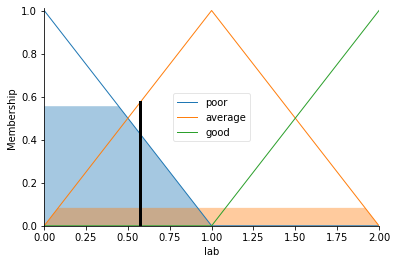

In [32]:
lab.view(sim=detect_lab)

In [33]:
## Notebook Ended
## Notebook Ended
## Notebook Ended 
## Notebook Ended
## Notebook Ended